In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline


# Sheet 1

xtp778 - Jens Egholm Pedersen

## 1.1

In [6]:
!echo "[23,45,-23,44,23,54,23,12,34,54,7,2, 4,67] [-2, 3, 4,57,34, 2, 5,56,56, 3,3,5,77,89]" | ./assignment1

73i32


## 1.2

In [5]:
!for s in 100 1000 10000 100000 1000000 5000000 10000000; do futhark-dataset -g "[$s]i32" -g "[$s]i32" > "$s.dat"; done

In [45]:
out = !for s in 100 1000 10000 100000 1000000 5000000 10000000; do echo $s && ./assignment1 -t /dev/stderr > /dev/null < "$s.dat"; done

In [4]:
def parse_output(out):
    sizes = []
    times = []
    for index in range(0, len(out), 3):
        sizes.append(out[index])
        times.append(out[index + 2])
    return (sizes, times)

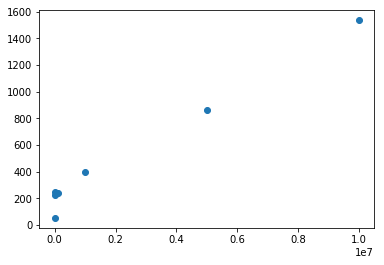

In [57]:
sizes, times = parse_output(out)
plt.scatter(x = sizes, y = times)

This code was run an an Asus X550V laptop, with a GeForce GTX 950M graphics card and an i7-6700HQ 2.60GHz Intel CPU

## 1.3

In [52]:
!echo "[23,45,-23,44,23,54,23,12,34,54,7,2, 4,67] [-2, 3, 4,57,34, 2, 5,56,56, 3,3,5,77,89]" | ./assignment1.3

./assignment1.3: /usr/local/cuda-8.0/targets/x86_64-linux/lib/libOpenCL.so.1: no version information available (required by ./assignment1.3)
73i32
12i32


The result shows that the largest difference between any two points (at the same index) is 73, and that the number is located at index 12.

In [61]:
out_1_3 = !for s in 100 1000 10000 100000 1000000 5000000 10000000; do echo $s && ./assignment1.3 -t /dev/stderr > /dev/null < "$s.dat"; done

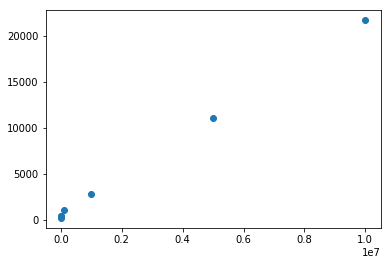

In [62]:
sizes, times = parse_output(out_1_3)
plt.scatter(x = sizes, y = times)

The above figure shows that this scales linearly like the previous example (without the index), since the points follow the same straight line. If the points would curve in any direction the correlation would no longer be linear. It takes a bit longer compared to `1.2` because of the extra indexing however.

## 1.4

$$(v_1, f_1) \oplus' (v_2, f_2) = (if \: f_2 \: then \: v_2 \:else \: v_1 \oplus v_2, f_1 \vee f_2)$$ 

If $(0, False)$ is left neutral, then the following should apply:

$$(0, False) \oplus' (v_2, f_2)$$

$$= (if \: f_2 \: then \: v_2 \: else \: 0 \oplus v_2, False \vee f_2)$$

$$= (v_2, f_2)$$

We can then conclude that $(0, False)$ is indeed left neutral.

## 2.1

In [15]:
! echo "0.1" | ./assignment2.3 | ./viz.sh

0000100000000000000000000000000000000000000000000000000000000000000000
0000011000000000000000000000000000000000000000000000000000000000000000
0000000110000000000000000000100000000000000000000000000000000000000000
0000000001110000000000000001110000000000000000000000000000000000000000
0000000000001100000000000001000000000000000000000000000000000000000000
0000000000000011100000000011000000000000000000000000000000000000000000
0000000000000000011000001101000000000000000000000000000000000000000000
0000010000000000000110010001000000000000000000000000000000000000000000
0000010000000000000001110001000000000000000000000000000000000000000000
0000010000000000000011001101000000000000000000000000000000000000000000
0000010000000000000100000011100000000000000000000000000000000000000000
0000010000000000001000000001011000000000000000000000000000000000000000
0000010000000000110000000001000110000000000000000000000000000000000000
0000010000000001000000000001000001110000000000000000000000000000000000
000001

In [16]:
! echo "0.4" | ./assignment2.3 | ./viz.sh

0000000001000000000100000000000010000000000000000000000000000000000000
0000000001000000000011000000000111000000000000000000000000000000000000
0000000001000000000000100000011100000000000000000000000000000000000000
0000000010000000000000010011101000000000000000000000000000000000000000
0000000010000000000000001100001000000000000000000000000000000000000000
0000000010000000000000110100010000000000000000000000000000000000000000
0000000100000000000111000011010000000000000000000000000000000000000000
0000000100000000011000000000100000000000000000000000000000000000000000
0000001110000001100000000000110000000000000000000000000000000000000000
0000000101101110000000000001001000000000000000000000000000000000000000
0000001000111000000000000001000110000000000000000000000000000000000000
0000001011000111000000000001000001000000000000000000000000000000000000
0000011100000000110000000010000000100000000000000000000000000000000000
0001110000000000001100000010000000010000000000000000000000000000000000
011000

In [17]:
! echo "0.8" | ./assignment2.3 | ./viz.sh

0000000000100100000000000000001000000010000000000000000000000000000000
0001111111111111111111111111111111111110000000000000000000000000000000
0000000010000001000000000000000100001000000000000000000000000000000000
0000000000000000100000000000000010010000000000000000000000000000000000
0000000000000000010000000000000010100000000000000000000000000000000000
0000000000000000001000000000000001000000000000000000000000000000000000
0000000000000000000100000000000011000000000000000000000000000000000000
0000000000000000000010000000000100100000000000000000000000000000000000
0000000000000000000001000000001000100000000000000000000000000000000000
0000000000000000000000000000010000010000000000000000000000000000000000
0000000000000000000000000000100000010000000000000000000000000000000000
0000000000000000000000000001000000001000000000000000000000000000000000
0000000000000000000000000010000000001000000000000000000000000000000000
0000000000000000000000000100000000000100000000000000000000000000000000
000000

# 3.1

In [3]:
!for s in 100 10000 1000000; do futhark-dataset --f32-bounds='0:2' -g "[$s]f32" -g "[$s]f32" > "pi$s.dat"; done

In [9]:
out = !for s in 100 10000 1000000; do echo $s && ./assignment3.1 -t /dev/stderr > /dev/null < "pi$s.dat"; done

In [10]:
out

['100', '1545', '10000', '165446', '1000000', '16840817']

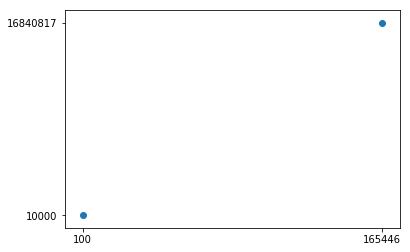

In [11]:
sizes, times = parse_output(out)
plt.scatter(x = sizes, y = times)